### IMPORTING LIBRARIES

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_absolute_error, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Reading the CSV File
pp_data = pd.read_csv('preprocessed_dataset/preprocessed_adult_data.csv')
pp_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_num
0,39.0,5,77516,9,12,4,0,1,4,1,2174.0,1887.0,40,38,0,0
1,50.0,4,83311,9,12,2,3,0,4,1,7298.0,1887.0,13,38,0,0
2,38.0,2,215646,11,8,0,5,1,4,1,7298.0,1887.0,40,38,0,0
3,53.0,2,234721,1,6,2,5,0,2,1,7298.0,1887.0,40,38,0,0
4,28.0,2,338409,9,12,2,9,5,2,0,7298.0,1887.0,40,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43837,33.0,2,245211,9,12,4,9,3,4,1,7298.0,1887.0,40,38,0,0
43838,39.0,2,215419,9,12,0,9,1,4,0,7298.0,1887.0,36,38,0,0
43839,38.0,2,374983,9,12,2,9,0,4,1,7298.0,1887.0,50,38,0,0
43840,44.0,2,83891,9,12,0,0,3,1,1,5455.0,1887.0,40,38,0,0


#### NORMALIZATION (Scaling of values - StandardScalar)

In [37]:
X = pp_data[['marital-status', 'education-num', 'relationship', 'sex', 'age', 'capital-gain']]
y = pp_data['income']

In [38]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

### TRAIN/TEST SPLIT

In [39]:
# Splitting train, test variables, where test is 20% of the dataframe.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
X_train.shape, X_test.shape

((35073, 6), (8769, 6))

In [41]:
X_train.head()

,marital-status,education-num,relationship,sex,age,capital-gain
5085,-1.717954,0.341252,-0.257518,-1.435601,-0.108245,-0.013185
17432,-0.386591,-0.445247,-0.883180,0.696572,0.126075,-0.013185
710,-1.717954,0.734502,-0.257518,0.696572,0.360396,-0.013185
1972,-0.386591,1.521001,-0.883180,0.696572,0.516610,-0.013185
14948,-0.386591,1.127751,-0.883180,0.696572,0.594717,-0.013185


### MODEL TRAINING & MODEL PERFORMANCE METRICS

### NAÏVE BAYES

In [42]:
# Creating a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
gnb = model.fit(X_train,y_train)

# Predictions on the test set
gnb_predictions = gnb.predict(X_test)

# Evaluate Naïve Bayes Classifier
print("Naïve Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, gnb_predictions))
print("Classification Report:")
print(classification_report(y_test, gnb_predictions))

Naïve Bayes Classifier:
Accuracy: 0.7973543163416581
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      6544
           1       0.63      0.48      0.54      2225

    accuracy                           0.80      8769
   macro avg       0.74      0.69      0.71      8769
weighted avg       0.78      0.80      0.79      8769



In [43]:
model.score(X_train, y_train)

0.8058335471730391

In [44]:
model.score(X_test, y_test)

0.7973543163416581

Random Prediction: ROC AUC=0.500
Naïve Bayes: ROC AUC=0.828


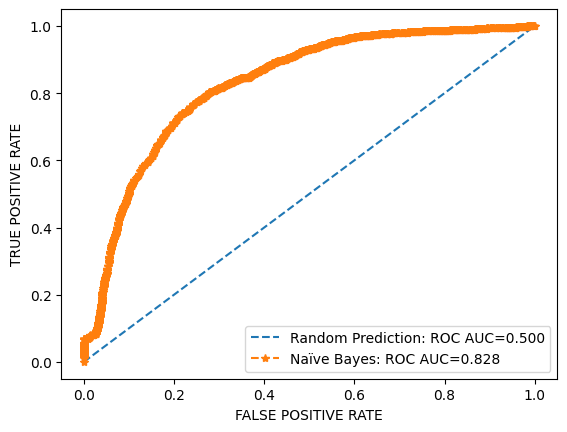

In [45]:
# Predict probabilities
nb_probs = model.predict_proba(X_test)

# Keep probabilities for the positive outcome only
nb_probs1 = nb_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs1)

# Summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Naïve Bayes: ROC AUC=%.3f' % (nb_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs1)

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naïve Bayes: ROC AUC=%.3f' % (nb_auc))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()


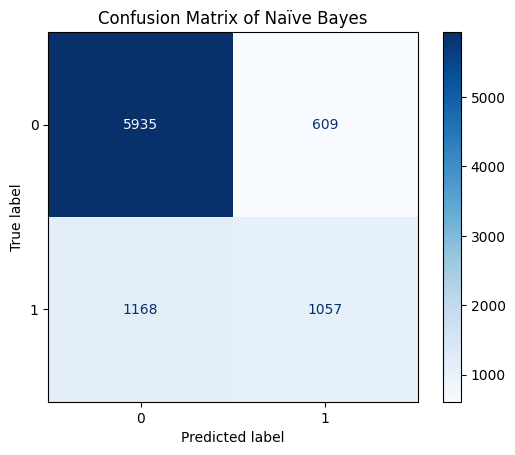

In [46]:
# Display the confusion matrix
cm = confusion_matrix(y_test, gnb_predictions, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Naïve Bayes")
plt.show()

### RANDOM FOREST

In [47]:
# Initialize the classifier
random= RandomForestClassifier(random_state=42)

# Fit GridSearchCV
rf_model = random.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluate Naïve Bayes Classifier
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classifier:
Accuracy: 0.8270042194092827
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6544
           1       0.70      0.57      0.62      2225

    accuracy                           0.83      8769
   macro avg       0.78      0.74      0.76      8769
weighted avg       0.82      0.83      0.82      8769



In [48]:
random.score(X_train, y_train)

0.8628574687081231

In [49]:
random.score(X_test, y_test)

0.8270042194092827

Random Prediction: ROC AUC=0.500
Random Forest: ROC AUC=0.873


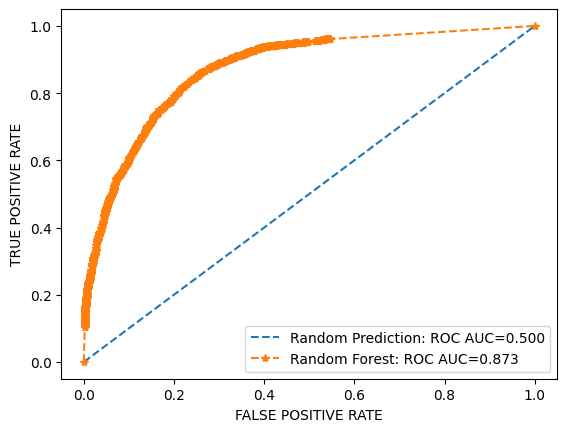

In [50]:
# Predict probabilities
rf_probs = random.predict_proba(X_test)
# Keep probabilities for the positive outcome only
rf_probs1 = rf_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs1)

# Summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs1)

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()

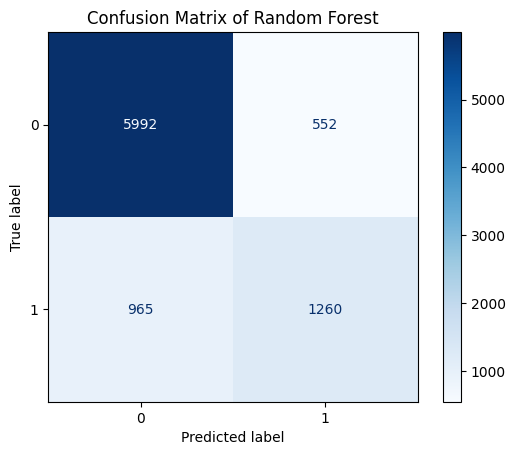

In [51]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Random Forest")
plt.show()

### COMPARING THE TWO MODELS

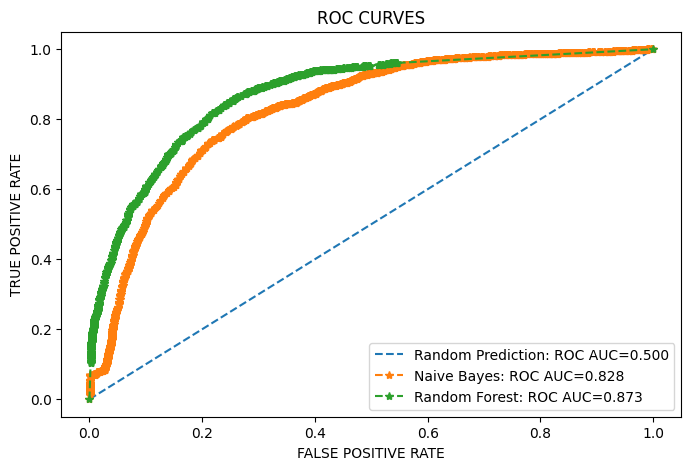

In [52]:
plt.figure(figsize=(8,5))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naive Bayes: ROC AUC=%.3f' % (nb_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))

plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC CURVES')
plt.legend()
plt.show()

In [53]:
random_forest_accuracy = random.score(X_test, y_test)
naïve_bayes_accuracy = model.score(X_test, y_test)

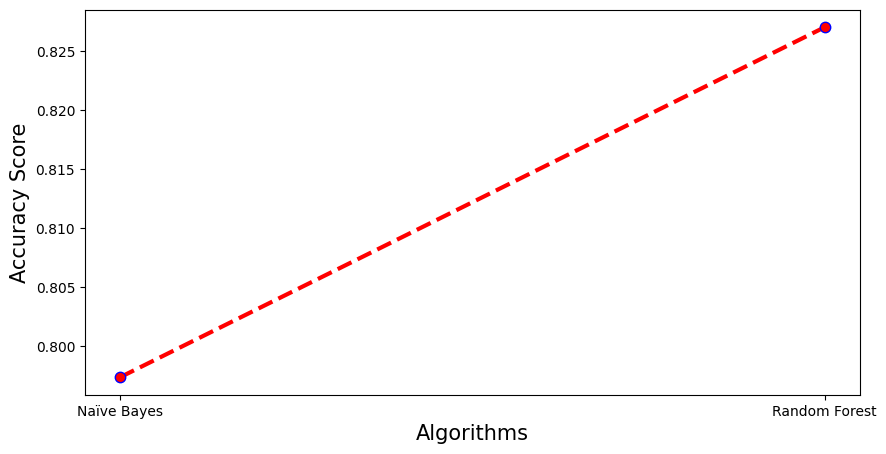

In [54]:
# Comparing Different algorithm models with their respective accuracy.
x=['Naïve Bayes','Random Forest']
y=[naïve_bayes_accuracy, random_forest_accuracy]

plt.figure(1,figsize=(10,5))

plt.plot(x,y,label='line width is 5x',linewidth=3,linestyle="--",color="red",marker='.',markersize=15,markeredgecolor="blue")
plt.xlabel("Algorithms",fontsize=15)
plt.ylabel("Accuracy Score",fontsize=15)

plt.show() 